In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from lib import *
from svm import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
# visualize data
# e.g. visualize(train_data[1266, :], train_lable[1266])
def visualize(data, lable = None):
    data_x = data[::2]
    data_y = data[1::2]
    plt.plot(data_x, data_y)
    if lable != None:
        print "Number is : ", lable

In [124]:
data, lable  = load_train()
train_data, train_lable, validation_data, validation_lable = shuffleData(data, lable)
print "train data: ", train_data.shape
print "train lable: ", train_lable.shape

train data:  (3000L, 16L)
train lable:  (3000L,)


In [125]:
train_lable[train_lable <= 4 ] = -1
train_lable[train_lable > 4] = 1
validation_lable[validation_lable <= 4 ] = -1
validation_lable[validation_lable > 4] = 1

In [ ]:
alpha, b = SMO(2, 1e-5, validation_data, validation_lable, train_data, train_lable, max_passes = 3, kernel=kernel_gaussian, max_iter =10)
alpha.max()

now ir = 1; Train Correct = 0.47533333333333333; Validation Correct = 0.5281501340482574
now ir = 2; Train Correct = 0.976; Validation Correct = 0.9651474530831099
now ir = 3; Train Correct = 0.9976666666666667; Validation Correct = 0.9919571045576407
now ir = 4; Train Correct = 0.9986666666666667; Validation Correct = 0.9932975871313673
now ir = 5; Train Correct = 0.9993333333333333; Validation Correct = 0.9946380697050938
now ir = 6; Train Correct = 0.9843333333333333; Validation Correct = 0.9651474530831099
now ir = 7; Train Correct = 0.9993333333333333; Validation Correct = 0.9973190348525469


Number is :  -1.0
0.0


1

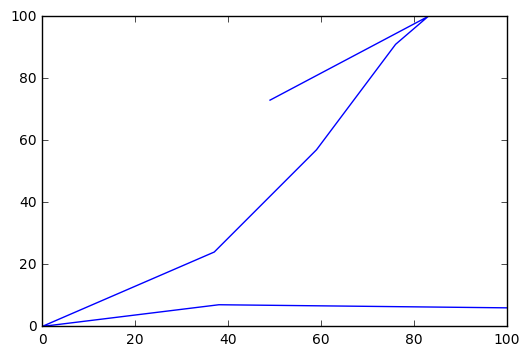

In [35]:
num = 234
visualize(validation_data[num,:],validation_lable[num] )
pre = predict(validation_data[num,:], train_data, train_lable, alpha, b, kernel_gaussian)
print pre
if pre < 0:
    pre = -1
else:
    pre = 1
pre

In [183]:
# svm main
clf = svm.SVC()
clf.fit(train_data, train_lable)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [197]:
trainErr = []
validationErr = []
for i in range (1):
    # svm main
    ir = 5 * i 
    print "iter: ", ir
    clf = svm.SVC(max_iter=100)
    clf.fit(train_data, train_lable)
    terror = test(train_data, train_lable, clf)
    print "test correcr rate: ",terror
    trainErr.append(terror)
    verror = test(validation_data, validation_lable, clf)
    print "validation correcr rate: ",verror
    validationErr.append(verror)
#plt.plot(trainErr)
#plt.plot(validationErr)

iter:  0
test correcr rate:  0.991666666667
validation correcr rate:  0.98927613941


(1L, 16L)
[ 3.]


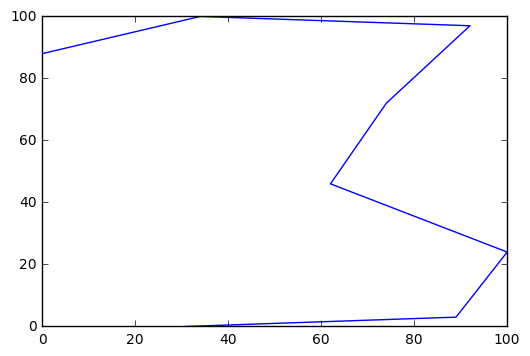

In [91]:
sample = train_data[1200,:]
visualize(sample)
sample= sample.reshape(1, -1)
print sample.shape
print clf.predict(sample)

(1L, 16L)
[ 0.]


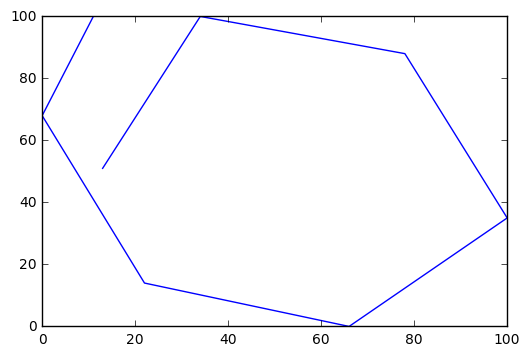

In [94]:
sample = validation_data[60,:]
visualize(sample)
sample= sample.reshape(1, -1)
print sample.shape
print clf.predict(sample)

In [62]:
sample.reshape(1, 16)

array([[ 100.,   83.,   29.,  100.,   27.,   65.,   86.,   32.,   59.,
           0.,    0.,   21.,   45.,   58.,   99.,   89.]])

In [59]:
sample = test[85,:]
